# Data Transformations

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
amzn = pd.read_excel('AMZN.xlsx')
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
1,2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2,2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
3,2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
4,2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100,796.919983


In [9]:
#amzn.drop('Adj Close', axis=1, inplace=True)
amzn = amzn.round(2)
amzn.head()

,Date,High,Low,Open,Close,Volume
0,2017-01-03,758.76,747.70,757.92,753.67,3521100
1,2017-01-04,759.68,754.20,758.39,757.18,2510500
2,2017-01-05,782.40,760.26,761.55,780.45,5830100
3,2017-01-06,799.44,778.48,782.36,795.99,5986200
4,2017-01-09,801.77,791.77,798.00,796.92,3446100


In [11]:
amzn['Change'] = np.log(amzn.Close).diff()
amzn['Volatility'] = amzn.Change.rolling(21).std()
amzn = amzn[21:]

In [12]:
amzn.head()

,Date,High,Low,Open,Close,Volume,Change,Volatility
21,2017-02-02,842.49,828.26,836.59,839.95,7350500,0.009089,0.010050
22,2017-02-03,818.30,804.00,806.72,810.20,10868800,-0.036061,0.013491
23,2017-02-06,810.72,803.00,809.80,807.64,3897300,-0.003165,0.012034
24,2017-02-07,816.16,807.50,809.31,812.50,3466100,0.005999,0.011356
25,2017-02-08,821.48,812.50,812.69,819.71,2858000,0.008835,0.011485


In [13]:
amzn['Exp Change'] = (amzn.Close * amzn.Volatility).shift(1)
amzn['Actual Change'] =amzn.Close - amzn.Close.shift(1)
amzn = amzn[1:]

In [14]:
amzn.head()

,Date,High,Low,Open,Close,Volume,Change,Volatility,Exp Change,Actual Change
22,2017-02-03,818.30,804.00,806.72,810.20,10868800,-0.036061,0.013491,8.441525,-29.75
23,2017-02-06,810.72,803.00,809.80,807.64,3897300,-0.003165,0.012034,10.930476,-2.56
24,2017-02-07,816.16,807.50,809.31,812.50,3466100,0.005999,0.011356,9.718945,4.86
25,2017-02-08,821.48,812.50,812.69,819.71,2858000,0.008835,0.011485,9.226938,7.21
26,2017-02-09,825.00,819.71,821.60,821.36,2484900,0.002011,0.011470,9.414502,1.65


In [15]:
amzn['Magnitude'] = amzn['Actual Change'] / amzn['Exp Change']
amzn.head()

,Date,High,Low,Open,Close,Volume,Change,Volatility,Exp Change,Actual Change,Magnitude
22,2017-02-03,818.30,804.00,806.72,810.20,10868800,-0.036061,0.013491,8.441525,-29.75,-3.524245
23,2017-02-06,810.72,803.00,809.80,807.64,3897300,-0.003165,0.012034,10.930476,-2.56,-0.234208
24,2017-02-07,816.16,807.50,809.31,812.50,3466100,0.005999,0.011356,9.718945,4.86,0.500054
25,2017-02-08,821.48,812.50,812.69,819.71,2858000,0.008835,0.011485,9.226938,7.21,0.781408
26,2017-02-09,825.00,819.71,821.60,821.36,2484900,0.002011,0.011470,9.414502,1.65,0.175262


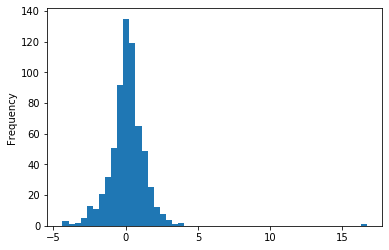

In [16]:
amzn.Magnitude.plot(kind='hist', bins=50)

In [17]:
amzn[amzn.Magnitude > 5]

,Date,High,Low,Open,Close,Volume,Change,Volatility,Exp Change,Actual Change,Magnitude
207,2017-10-27,1105.58,1050.55,1058.14,1100.95,16565000,0.124131,0.028028,7.705032,128.52,16.680009


In [18]:
amzn.to_excel('AMZN_NEW.xlsx', sheet_name='data')